# 1. Importing the relevant libraries and data

Let us import all the relevant libraries and also the data upon which we are gonna perform EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# 2. Data Cleaning

At the very start, we would like to check for the presence of any null values in our data. To get a quick glance, we can use a heatmap that will give us a good idea of what features require extra attention with respect to missing values.

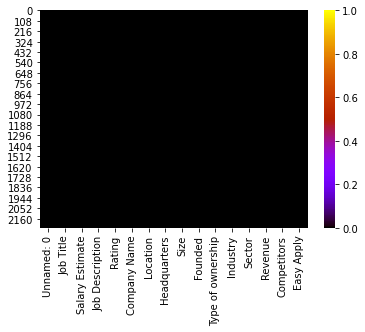

In [3]:
sns.heatmap(df.isnull(),cmap='gnuplot')

Great ! It looks like there aren't any or extremely negligible missing values in the dataframe. However, instead of a null value, the data maybe replaced by keywords such as 'NA' or 'null'. We shall check for those later in our data cleaning operation.

Let us confirm that there aren't any null values in the dataframe.

In [4]:
df.isna().any()

Unnamed: 0           False
Job Title            False
Salary Estimate      False
Job Description      False
Rating               False
Company Name          True
Location             False
Headquarters         False
Size                 False
Founded              False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Competitors          False
Easy Apply           False
dtype: bool

Oh wow ! There seems to be a few missing values in the company name column. However, since our data analysis wouldn't require much use of company name, hence we aren't bothered by it. However, let us check the number of missing values for curiosity sake.

In [5]:
df['Company Name'].isna().value_counts()

False    2252
True        1
Name: Company Name, dtype: int64

So, there is just one single company name which is missing. We can safely dismiss the presence of any missing values since we shall be dropping the Companu Name column anyway.

Next, we shall check the various data types that we will be dealing with. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
Unnamed: 0           2253 non-null int64
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 281.8+ KB


## Droppable columns

As we look at the various columns, we see that not all the columns are important to us. These can be dropped immediately to make the data less cluttered. Let's see which columns may be removed.

In [7]:
unn_col=['Unnamed: 0','Job Description','Company Name']
for cols in unn_col:
    df.drop(cols,axis=1,inplace=True)
df.head()

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


## Salary Estimate

Upon glancing at the above data types, we see that there is an issue with salary estimate. Here, since the estimate is given to us in a range figure, we need to split the lower and upper bounds of the salaries into the max salary and min salary column. 

Let us solve the salary range issue now.


**But wait ! There is something weird about the data. One of the entries have -1 which is weird as it doesn't make sense. Let us assume that -1 actually refers to null value. We shall replace this data with the mode of the data.**



In [8]:
df['Salary Estimate'].mode()[0]

'$41K-$78K (Glassdoor est.)'

In [9]:
df['Salary Estimate']=df['Salary Estimate'].replace('-1',df['Salary Estimate'].mode()[0])

Let us first remove the source of the salary listing i.e. Glassdoor.

**split(separator,max_splits)**

In [10]:
df['Salary Estimate'],_=df['Salary Estimate'].str.split('(',1).str

In [11]:
df['Salary Estimate']

0        $37K-$66K 
1        $37K-$66K 
2        $37K-$66K 
3        $37K-$66K 
4        $37K-$66K 
           ...     
2248    $78K-$104K 
2249    $78K-$104K 
2250    $78K-$104K 
2251    $78K-$104K 
2252    $78K-$104K 
Name: Salary Estimate, Length: 2253, dtype: object

In [12]:
df['Min_Salary'],df['Max_Salary']=df['Salary Estimate'].str.split('-').str

In [13]:
df.head()

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,$37K,$66K
1,Quality Data Analyst,$37K-$66K,3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,$37K,$66K
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,$37K,$66K
3,Data Analyst,$37K-$66K,4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,$37K,$66K
4,Reporting Data Analyst,$37K-$66K,3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,$37K,$66K


As we can see, we have separated the salaries into Minimum salary and maximum salary. However, there is still some unncecessary info the columns which we need to clean. Let us try to do that using the split function. In addition, it is important to change the datatype of salary from string to int. Let us attempt to do that aswell. 

In [14]:
df['Min_Salary']=df['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df['Max_Salary']=df['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

In [15]:
df.head()

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66
1,Quality Data Analyst,$37K-$66K,3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37,66
3,Data Analyst,$37K-$66K,4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37,66
4,Reporting Data Analyst,$37K-$66K,3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Rating               2253 non-null float64
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
Min_Salary           2253 non-null int64
Max_Salary           2253 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 264.1+ KB


As we can see, we have successfully cleaned the data for max salary and min salary in their integer forms. 

## Missing Values

Although we initially claimed that there were no missing values, it is now seen that in the dataframe, instead of null values, -1 has been entered. Hence, what we can do is replace all the -1 with null values. This will let us fill the null values with other suitable values such as mean or mode.

Let us now create the heatmap again that will give us an idea of the number of missing values in each column. 


In [17]:
df.replace('-1',np.nan,inplace=True)

In [18]:
df.head()

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37,66
1,Quality Data Analyst,$37K-$66K,3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37,66
3,Data Analyst,$37K-$66K,4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37,66
4,Reporting Data Analyst,$37K-$66K,3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66


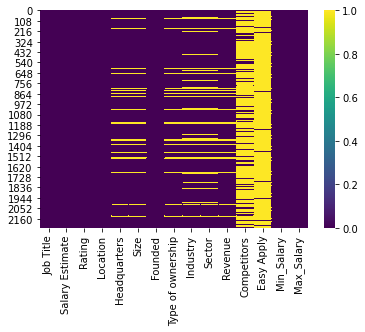

In [19]:
sns.heatmap(df.isna(),cmap='viridis')

Oh boy ! Extremely high number of missing values in competitors and easy apply columns. Considerable missing values in a few more columns.

Let us check the number of missing values.

In [20]:
miss_values=[]
def check_null(df):
    for i in range(df.columns.shape[0]):
        if df.iloc[:,i].isnull().any():
            print('Missing values in {} : {} '.format(df.columns[i],df.iloc[:,i].isna().value_counts()[1]))
            miss_values.append(df.iloc[:,i].isna().value_counts()[1])
            i+=1


In [27]:
miss_val_arr=np.array(miss_values)
miss_val_arr

array([ 172,  163,  163,  353,  353,  163, 1732, 2173])

In [21]:
check_null(df)

Missing values in Headquarters : 172 
Missing values in Size : 163 
Missing values in Type of ownership : 163 
Missing values in Industry : 353 
Missing values in Sector : 353 
Missing values in Revenue : 163 
Missing values in Competitors : 1732 
Missing values in Easy Apply : 2173 


Let us make this into a more readable dataframe.

In [22]:
null_cols=[]
for i in range(df.columns.shape[0]):
    if df.iloc[:,i].isnull().any():
        null_cols.append(df.columns[i])
null_arr=np.array(null_cols)

In [38]:
miss_val=pd.DataFrame(null_arr)
miss_val.rename(columns={0:'Column name'},inplace=True)
miss_val['Missing values']=miss_val_arr
miss_val['Percentage missing (%)']=np.round(100* miss_val['Missing values']/df.shape[0],1)

In [39]:
miss_val

,Column name,Missing values,Percentage missing (%)
0,Headquarters,172,7.6
1,Size,163,7.2
2,Type of ownership,163,7.2
3,Industry,353,15.7
4,Sector,353,15.7
5,Revenue,163,7.2
6,Competitors,1732,76.9
7,Easy Apply,2173,96.4


There we have it ! As we can see, 96.45% of values in Easy apply are null while 76.88% of Competitor values are high. These are quite high.

Easy apply could be an indication are currently open for the particular role in that company. So far, only about 3.6% listings are open to hire. 

Regarding the competitors column, I believe we can consider this as an unimportant section since it doesn't provide us with any insights. Hence, we shall drop this value too.

In [40]:
df.drop('Competitors',axis=1,inplace=True)

,Job Title,Salary Estimate,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Min_Salary,Max_Salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),True,37,66
1,Quality Data Analyst,$37K-$66K,3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37,66
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,NaN,37,66
3,Data Analyst,$37K-$66K,4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,37,66
4,Reporting Data Analyst,$37K-$66K,3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),True,37,66


In order to make the Easy Apply data more readable, let us fill all the null values with false. This shall clearly indicate that the value is false and the company isn't hiring at the moment.

In [42]:
df['Easy Apply']=df['Easy Apply'].fillna('False')

With this, I believe we have cleaned the data just enough for us to perform some insightful data visualisations.

# 3. Data Visualisation

Alright, first off, let's check how the jobs pay.

## Salary Estimate

Let us see what are the most common salaries paid to the Data Analysts in the United States.

In [62]:
df_salaries=df.groupby('Salary Estimate')['Count'].sum().reset_index()

,Salary Estimate,Count
0,$110K-$190K,29
1,$113K-$132K,29
2,$24K-$48K,29
3,$26K-$47K,29
4,$27K-$52K,30


In [63]:
df_salaries.sort_values(by='Count',ascending=False,inplace=True)
df_salaries.head()

,Salary Estimate,Count
23,$41K-$78K,58
28,$42K-$76K,57
47,$50K-$86K,41
14,$35K-$67K,33
30,$43K-$76K,31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text major ticklabel objects>)

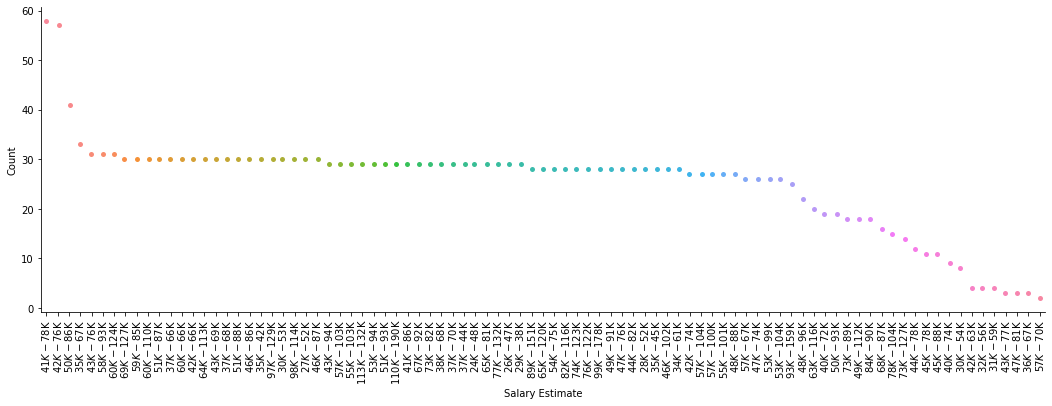

In [84]:

sns.catplot('Salary Estimate','Count',data=df_salaries,height=5,aspect=3)
plt.xticks(rotation=90)

As we can see, the data is extremely cluttered. It is seen the maximum jobs are paying in the range of 41K-78k $ a year to Data Analysts.

In order to make the data less cluttered, we shall consider the data for only the top 10 salary values. 

Text(0.5, 1.0, 'Top 10 salary estimates')

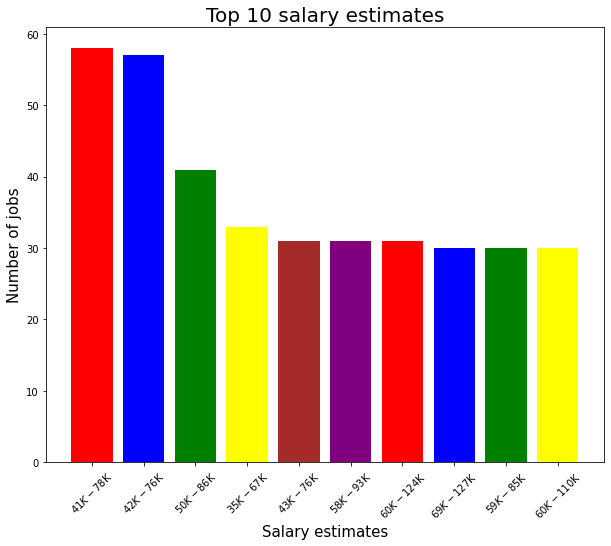

In [96]:
df_salaries_top=df_salaries.head(10)
plt.figure(figsize=(10,8))
plt.bar(df_salaries_top['Salary Estimate'],df_salaries_top['Count'],color=['red','blue','green','yellow','brown','purple'])
plt.xticks(rotation=45)
plt.xlabel('Salary estimates',size=15)
plt.ylabel('Number of jobs',size=15)
plt.title('Top 10 salary estimates',size=20)
